**José Enrique Zafra Mena**

# Set de Julia

Los conjuntos de Julia, son una familia de conjuntos fractales obtenidos al estudiar el comportamiento de los números complejos al ser iterados por una función holomorfa.

Considerese una función $f:\mathbb{C}\rightarrow \mathbb{C}$, de forma que dado un punto $z\in\mathbb{C}$ podemos realizar el proceso iterativo $z_{k+1}=f(z_k)$. Decimos que el punto $z$ pertenece al set de Julia de $f$ [denotado por $J(f)$] si la sucesión queda acotada.

## Representando el set de Julia:

- Considere la función $f(z)=z^2+c$, con $c\in\mathbb{C}$ y definir una función que dado un punto $z\in\mathbb{C}$ calcule $f(z)$. 

    **AYUDA**: Puede resultar útil que la función también tome $c$ como input.


- Crear una función que genere una matriz $z$ de tamaño $N\times M$, tal que $\left\{ z_{ij}\in\mathbb{C}\, |\, a\leq \Re(z_{ij})\leq b\, \mathrm{y}\, c\leq \Im(z_{ij})\leq d\right\}$.


- Hacer una función que reciba como entrada la matriz $z$, la constante $c$ y un número de iteraciones $n$, y que devuelva una matriz de las mismas dimensiones que $z$ cuyos valores sean $1$ si el punto $z_{ij}$ pertenece a $J(f_c)$, y $0$ en caso contrario. 

    **AYUDA**: Para comprobar si la sucesión es acotada usar  $|z_{ij}|<\mathrm{UMBRAL}$. Cuando la sucesión diverge debemos buscar una forma de mantener los resultados controlados. 

    **PISTA**: usar la matriz que toma valores 1 y 0.


- Hacer que la función anterior devuelva además una matriz donde se almacenan en qué iteración consideramos al punto $z_{ij}$ fuera del conjunto. 

    **PISTA**: la matriz de valores 1 y 0.


- Definir una función para representar gráficamente las dos matrices que devuelve la función anterior.

In [27]:
#Importar librerías
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


#Definicion de Variables globales que no cambian en el documento

#Definir funciones
plt.style.use("dark_background")

def f(z,c):
    Z=z**2+c
    return Z

def Z_Julia(N,M):
    a, b, c, d = -1.4, 1.4, -1.4, 1.4
    y,x=np.ogrid[a:b:M*1j, d:c:N*1j]
    Z=x+y*1j
    return Z

def Z_Mandelbrot(N,M):
    a, b, c, d = -1.4, 1.4, -2, 1
    y,x=np.ogrid[a:b:M*1j, c:d:N*1j]
    Z=x+y*1j
    return Z

def Z_real(N,M):
    a, b, c, d = -1, 1, -1, 1
    y,x=np.ogrid[a:b:M*1j, c:d:N*1j]
    Z=x+y*1j
    return np.abs(Z)

def Zoom_J(N,M):            # centrado en x,y= 0.2, -0.3
    [a,b,c,d] = np.array([0, 0.4, -0.5,-0.1])
    y,x=np.ogrid[a:b:M*1j, d:c:N*1j]
    Z=x+y*1j
    return Z

def Zoom_M(N,M):            # centrado en (x,y)=(-1.25, 0) \pm 0.3
    a, b, c, d = -0.14, 0.14, -1.4, -1.1
    y,x=np.ogrid[a:b:M*1j, c:d:N*1j]
    Z=x+y*1j
    return Z

def Julia(N,M,c,max_iter):
    Z=Z_Julia(N,M)
    C=np.full(Z.shape, c)
    diverged=np.zeros(Z.shape,dtype=int)
    not_diverged=np.full(C.shape, True, dtype=bool)
    for n in range(max_iter):
        Z[not_diverged]=f(Z[not_diverged],C[not_diverged])
        not_diverged[np.abs(Z) > 2]= False
        diverged[not_diverged]=n
    plt.imshow(diverged,cmap="twilight_shifted")
    plt.axis("off")
    plt.show()
    return diverged

def Julia_zoom(N,M,c,max_iter):
    Z=Zoom_J(N,M)
    C=np.full(Z.shape, c)
    diverged=np.zeros(Z.shape,dtype=int)
    not_diverged=np.full(C.shape, True, dtype=bool)
    for n in range(max_iter):
        Z[not_diverged]=f(Z[not_diverged],C[not_diverged])
        not_diverged[np.abs(Z) > 2]= False
        diverged[not_diverged]=n
    plt.imshow(diverged,cmap="twilight_shifted")
    plt.axis("off")
    plt.show()
    return diverged


def Mandelbrot(N,M,max_iter):
    c_array=Z_Mandelbrot(N,M)
    z_array=np.zeros([N,M])
    iters=max_iter+np.zeros([N,M])
    not_diverged=c_array < 1000
    for n in range(max_iter):
        z_array=z_array**2+c_array

        z_mod=z_array*np.conj(z_array)
        divergent=z_mod >4
        diverging=divergent & not_diverged

        iters[diverging]=n
        # para evitar overflow:
        z_array[divergent]=0
    plt.imshow(iters,cmap="twilight_shifted")
    plt.axis("off")
    plt.show()
    return iters

def Mandelbrot_zoom(N,M,max_iter):
    c_array=Zoom_M(N,M)
    z_array=np.zeros([N,M])
    iters=max_iter+np.zeros([N,M])
    not_diverged=c_array < 1000
    for n in range(max_iter):
        z_array=z_array**2+c_array

        z_mod=z_array*np.conj(z_array)
        divergent=z_mod >4
        diverging=divergent & not_diverged

        iters[diverging]=n
        # para evitar overflow:
        z_array[divergent]=0
    plt.imshow(iters,cmap="twilight_shifted")
    plt.axis("off")
    plt.show()
    return iters

def Feigenbaum(N,max_iter):
    w=int(0.05*max_iter)
    c=np.linspace(0,2,N)
    z=np.zeros([N,max_iter+w])
    for j in tqdm(range(1,max_iter+w)):
        z[:,j]=z[:,j-1]**2-c            # lo ponemos restando para que salga creciente en la gráfica
        diverg= z[:,j] >4               # los índices de los que divergen
        if j >= max_iter:
            plt.plot(c,-z[:,j],color= 'white',marker='.',markersize=.2,linestyle='None')
        for k in range(w):
            plt.plot(c[diverg],-z[diverg,j-k],color= 'white',marker='.',markersize=.2,linestyle='None')
    plt.show()


In [21]:
import numpy as np
A=np.arange(5)
B=np.zeros([int(0.05*100), 3])
print(B)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


- Representar algún set de Julia para comprobar que las funciones están definidas de forma correcta

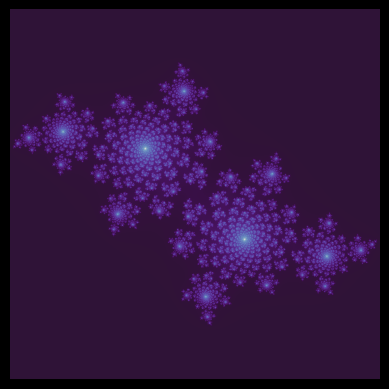

In [5]:
J1=Julia(2000,2000,-0.4+0.6j,10000)

- Estudiar la fractalidad de los set de Julia

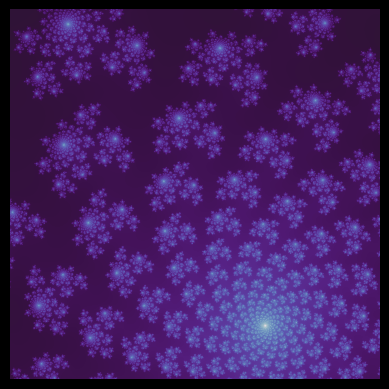

In [3]:
'''
Hacemos zoom centrando en (x,y)=(0.2,-0.3), con longitud
total del 0.2 tanto para la altura como para la base (Zoom 10X)

Podemos apreciar la autosemejanza característica de
los fractales.
'''

J3=Julia_zoom(2000,2000,-0.4+0.6j,10000)

# Set de Mandelbrot

Este conjunto esta fuertemente ligado al set de Julia. Considerese la función $f_c(z)=z^2+c$, con $z,\, c \in \mathbb{C}$. Fijado $c$ construimos la sucesión $z_{k+1}=f_c(z_k)$, con $z_0=0$. Decimos que $c$ perteece al set de Mandelbrot si la sucesión queda acotada.

## Representando el conjunto de Mandelbrot:

- Usando las funciones ya definidas, realizar un proceso iterativo para obtener una matriz que determine qué puntos $c$ del plano complejo pertenecen al set de Mandelbrot

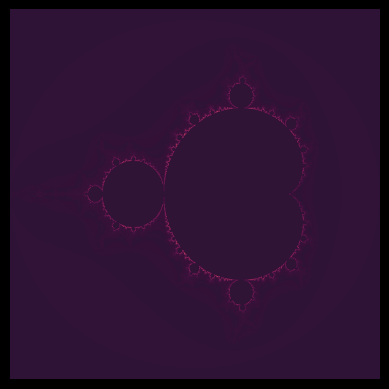

In [95]:
 M1=Mandelbrot(2000,2000,1000)

- Estudiar la fractalidad de los sets de Mandelbrot

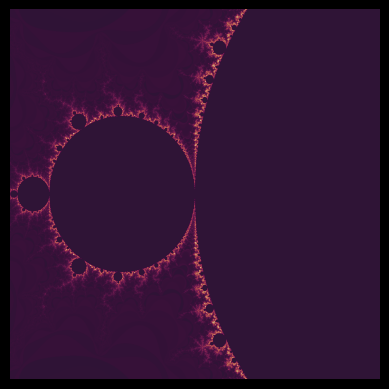

In [96]:
'''
Hacemos zoom centrando en (x,y)=(1.25, 0), con longitud
total del 0.28 para la altura y 0.3 para la base (Zoom 10X)

Podemos apreciar la autosemejanza característica de
los fractales.
'''

M2=Mandelbrot_zoom(2000,2000,1000)

# Diagramas de Feigenbaum:

Para el set de Mandelbrot, tomar $c$ sobre la recta real y representar los valores que toma $-z_k$ para las últimas iteraciones (por ejemplo el último $5\%$). 

**AYUDA**: al hacer la representación, sólo representar aquellos puntos que pertenecen al conjunto de Mandelbrot. Esto se puede hacer usando la matriz que define si los elementos están en el set.

¿Qué se puede ver en esta representación?

100%|██████████| 104/104 [00:00<00:00, 688.11it/s]


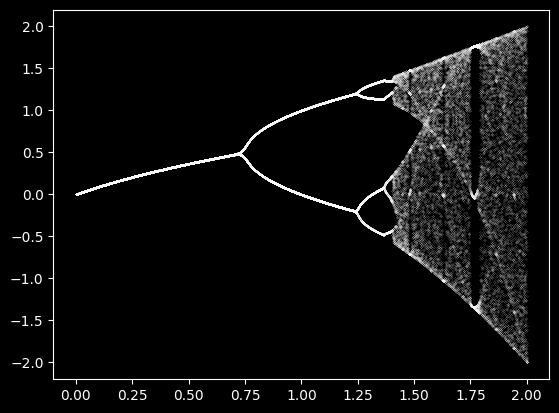

In [28]:
F0=Feigenbaum(10000,100)

**EXTRA**: Estimar la primera constante de Feigenbaum a partir del diagrama obtenido. 

**PISTA**: Usando la función derivada puede obtenerse información de los puntos de bifurcación.